# checking the correlation among features in dataframe using python and doing some Explanatory data analysis

In [10]:
#import section

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8)
pd.options.mode.chained_assignment = None


In [27]:
#reading the data

df1 = pd.read_csv("cleaned_movie_data.csv")
df1 = df1.sort_values(by =['gross'],inplace= False,ascending = False)
pd.set_option('display.max_rows',None)
df1.head()


,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,Actual_release_year
5445,Avatar,PG-13,Action,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009.0
7445,Avengers: Endgame,PG-13,Action,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019.0
3045,Titanic,PG-13,Drama,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015.0
7244,Avengers: Infinity War,PG-13,Action,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018.0


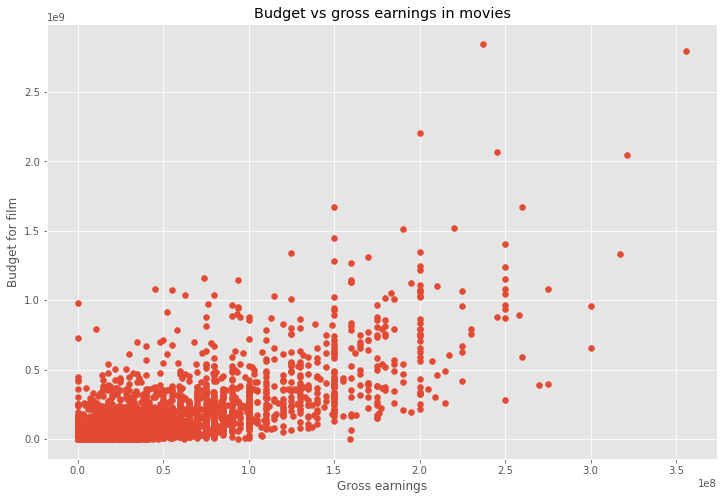

In [14]:
# Scatter plot with budget vs gross

plt.scatter(x = df1['budget'],y = df1['gross'])
plt.title("Budget vs gross earnings in movies")
plt.xlabel('Gross earnings')
plt.ylabel('Budget for film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

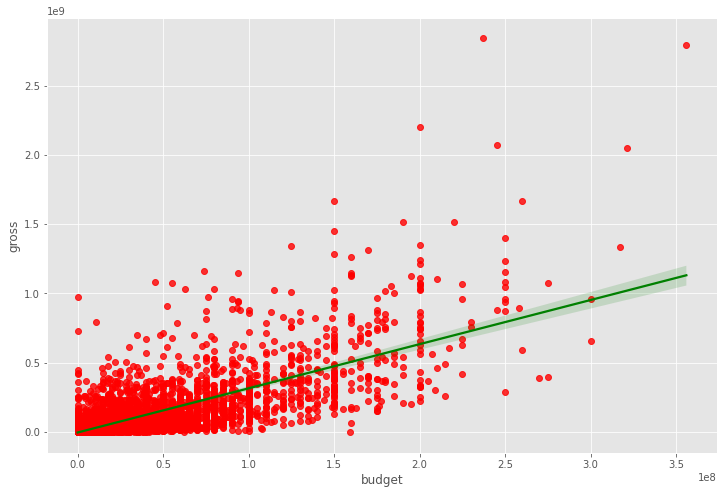

In [18]:
#regression plot to check the correlation between budget and  gross revenue

#plot budget vs gross using seaborn

sns.regplot(x = 'budget',y ='gross',data = df1,scatter_kws={"color":"red"},line_kws={"color":"green"})

In [20]:
#methods for correlation

#1 pearson default
#2 kendall
#3 spearman

In [21]:
#lets start exploring the correlation
#it only works on numerical fields

df1.corr(method= 'pearson')

,score,votes,budget,gross,runtime,Actual_release_year
score,1.000000,0.409182,0.055665,0.186392,0.399451,0.105994
votes,0.409182,1.000000,0.486862,0.632834,0.309212,0.218429
budget,0.055665,0.486862,1.000000,0.750157,0.269510,0.300066
gross,0.186392,0.632834,0.750157,1.000000,0.245235,0.255026
runtime,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
Actual_release_year,0.105994,0.218429,0.300066,0.255026,0.120636,1.000000


In [22]:

df1.corr(method= 'kendall')

,score,votes,budget,gross,runtime,Actual_release_year
score,1.000000,0.300115,-0.005194,0.090626,0.283611,0.073436
votes,0.300115,1.000000,0.439902,0.560118,0.198240,0.325814
budget,-0.005194,0.439902,1.000000,0.541956,0.176016,0.200327
gross,0.090626,0.560118,0.541956,1.000000,0.176912,0.206532
runtime,0.283611,0.198240,0.176016,0.176912,1.000000,0.096999
Actual_release_year,0.073436,0.325814,0.200327,0.206532,0.096999,1.000000


In [23]:

df1.corr(method= 'spearman')

,score,votes,budget,gross,runtime,Actual_release_year
score,1.000000,0.428138,-0.007500,0.132569,0.399857,0.107602
votes,0.428138,1.000000,0.604627,0.752265,0.290159,0.462767
budget,-0.007500,0.604627,1.000000,0.716816,0.246748,0.278693
gross,0.132569,0.752265,0.716816,1.000000,0.256783,0.300415
runtime,0.399857,0.290159,0.246748,0.256783,1.000000,0.142915
Actual_release_year,0.107602,0.462767,0.278693,0.300415,0.142915,1.000000


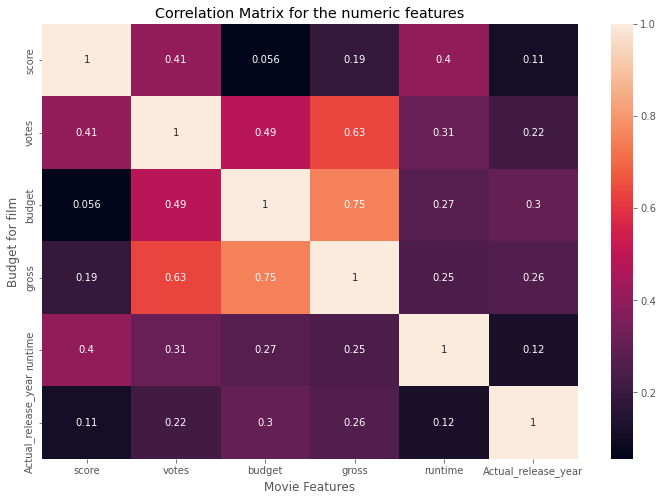

In [25]:
# high correlation bw budget and gross

# we are proceeding with pearson

correlation_matrix = df1.corr(method = 'pearson')
sns.heatmap(correlation_matrix,annot = True)
plt.title("Correlation Matrix for the numeric features")
plt.xlabel('Movie Features')
plt.ylabel('Budget for film')
plt.show()

In [29]:
#checking company names and assigning cat codes to the object columns

df_numerized = df1

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
       df_numerized[col]=df_numerized[col].astype('category') 
       df_numerized[col]= df_numerized[col].cat.codes

df_numerized.head()


,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,Actual_release_year
5445,533,5,0,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009.0
7445,535,5,0,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019.0
3045,6896,5,6,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997.0
6663,5144,5,0,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015.0
7244,536,5,0,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018.0


In [30]:
df1.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,Actual_release_year
5445,533,5,0,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009.0
7445,535,5,0,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019.0
3045,6896,5,6,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997.0
6663,5144,5,0,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015.0
7244,536,5,0,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018.0


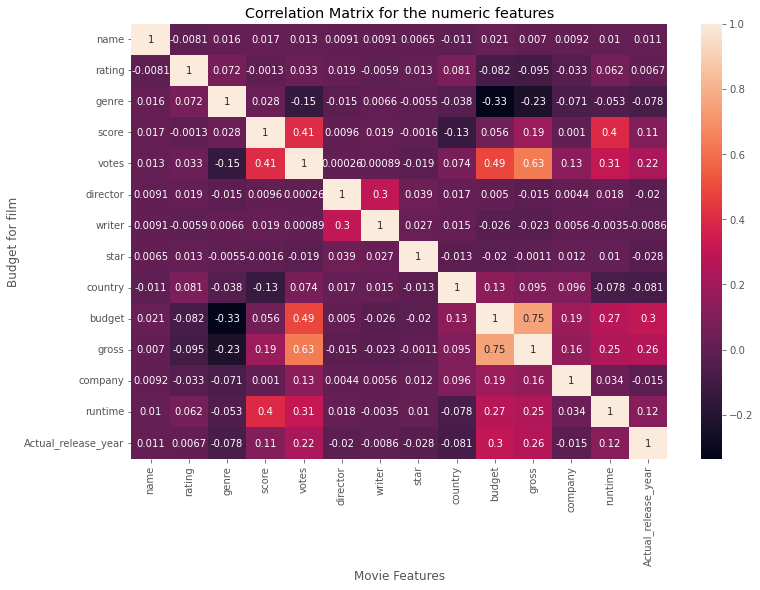

In [31]:
#plotting the correlation matrix again with the df_numerized
# as every column has a numeric presentation

correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix,annot = True)
plt.title("Correlation Matrix for the numeric features")
plt.xlabel('Movie Features')
plt.ylabel('Budget for film')
plt.show()

In [32]:
df_numerized.corr()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,Actual_release_year
name,1.000000,-0.008069,0.016355,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.010699
rating,-0.008069,1.000000,0.072423,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.006741
genre,0.016355,0.072423,1.000000,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.077911
score,0.017097,-0.001314,0.027965,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.105994
votes,0.013088,0.033225,-0.145307,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.218429
director,0.009079,0.019483,-0.015258,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.020422
writer,0.009081,-0.005921,0.006567,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.008611
star,0.006472,0.013405,-0.005477,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.027611
country,-0.010737,0.081244,-0.037615,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.131720,0.095325,0.095548,-0.078412,-0.080844
budget,0.020548,-0.081939,-0.334021,0.055665,0.486862,0.004976,-0.025911,-0.019952,0.131720,1.000000,0.750157,0.186474,0.269510,0.300066


In [33]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name                 name                   1.000000
                     rating                -0.008069
                     genre                  0.016355
                     score                  0.017097
                     votes                  0.013088
                     director               0.009079
                     writer                 0.009081
                     star                   0.006472
                     country               -0.010737
                     budget                 0.020548
                     gross                  0.006989
                     company                0.009211
                     runtime                0.010392
                     Actual_release_year    0.010699
rating               name                  -0.008069
                     rating                 1.000000
                     genre                  0.072423
                     score                 -0.001314
                     votes                  0.

In [34]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre                budget                -0.334021
budget               genre                 -0.334021
genre                gross                 -0.234297
gross                genre                 -0.234297
genre                votes                 -0.145307
votes                genre                 -0.145307
score                country               -0.133348
country              score                 -0.133348
gross                rating                -0.095450
rating               gross                 -0.095450
                     budget                -0.081939
budget               rating                -0.081939
Actual_release_year  country               -0.080844
country              Actual_release_year   -0.080844
                     runtime               -0.078412
runtime              country               -0.078412
Actual_release_year  genre                 -0.077911
genre                Actual_release_year   -0.077911
company              genre                 -0.

In [35]:
#filtering out the high correlation

high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross                votes                  0.632834
votes                gross                  0.632834
gross                budget                 0.750157
budget               gross                  0.750157
name                 name                   1.000000
company              company                1.000000
gross                gross                  1.000000
budget               budget                 1.000000
country              country                1.000000
star                 star                   1.000000
writer               writer                 1.000000
director             director               1.000000
votes                votes                  1.000000
score                score                  1.000000
genre                genre                  1.000000
rating               rating                 1.000000
runtime              runtime                1.000000
Actual_release_year  Actual_release_year    1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to the highest earnings

# company has a low correlation